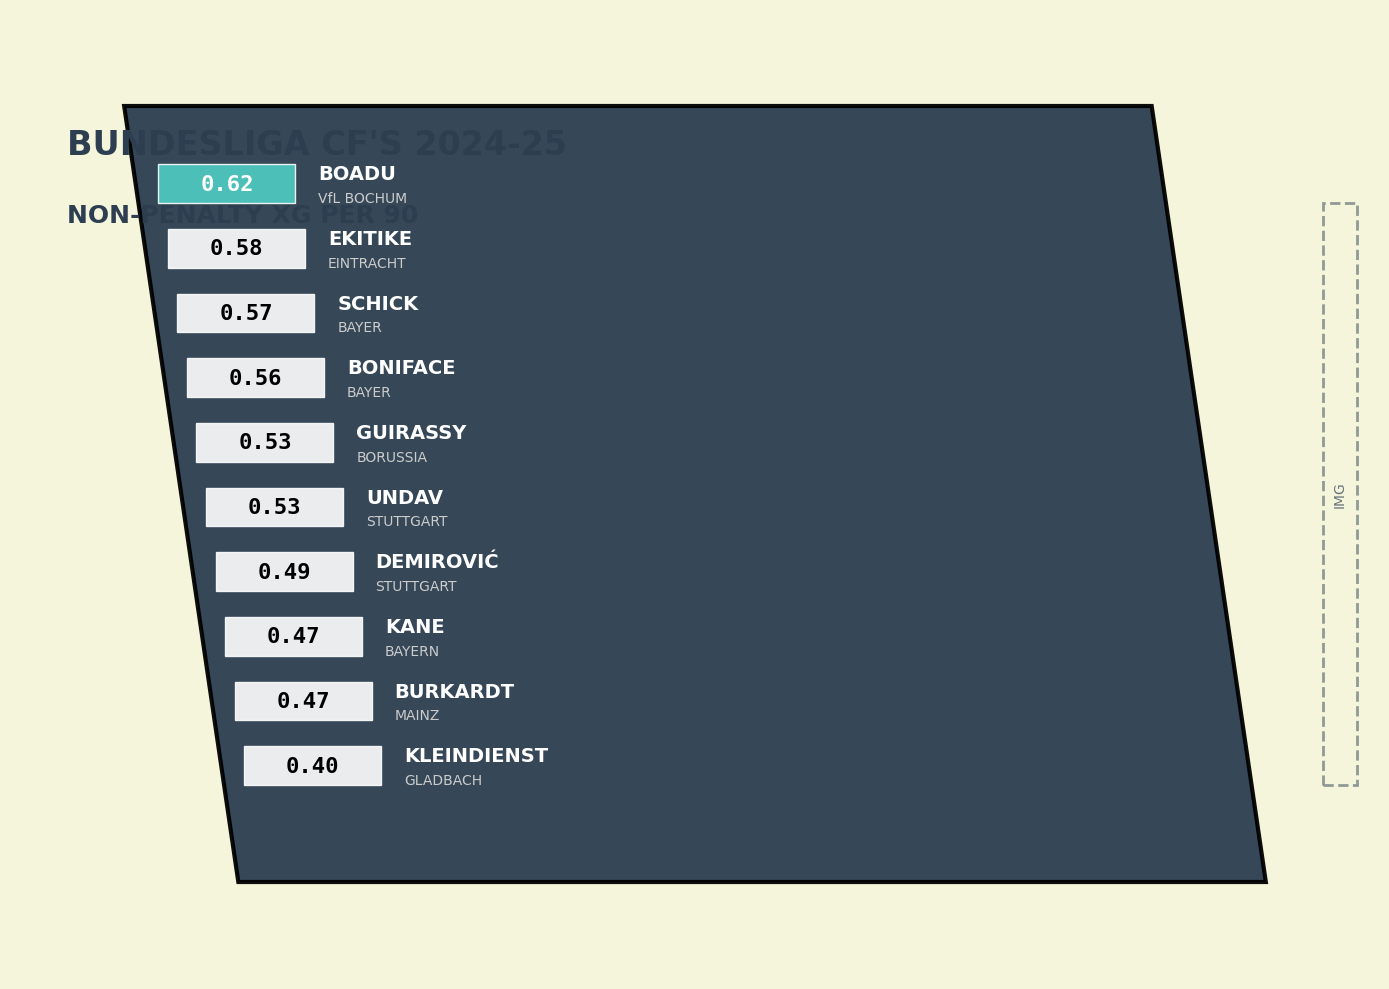

Text(0.5, 1.0, 'Forme avec angle personnalisé')

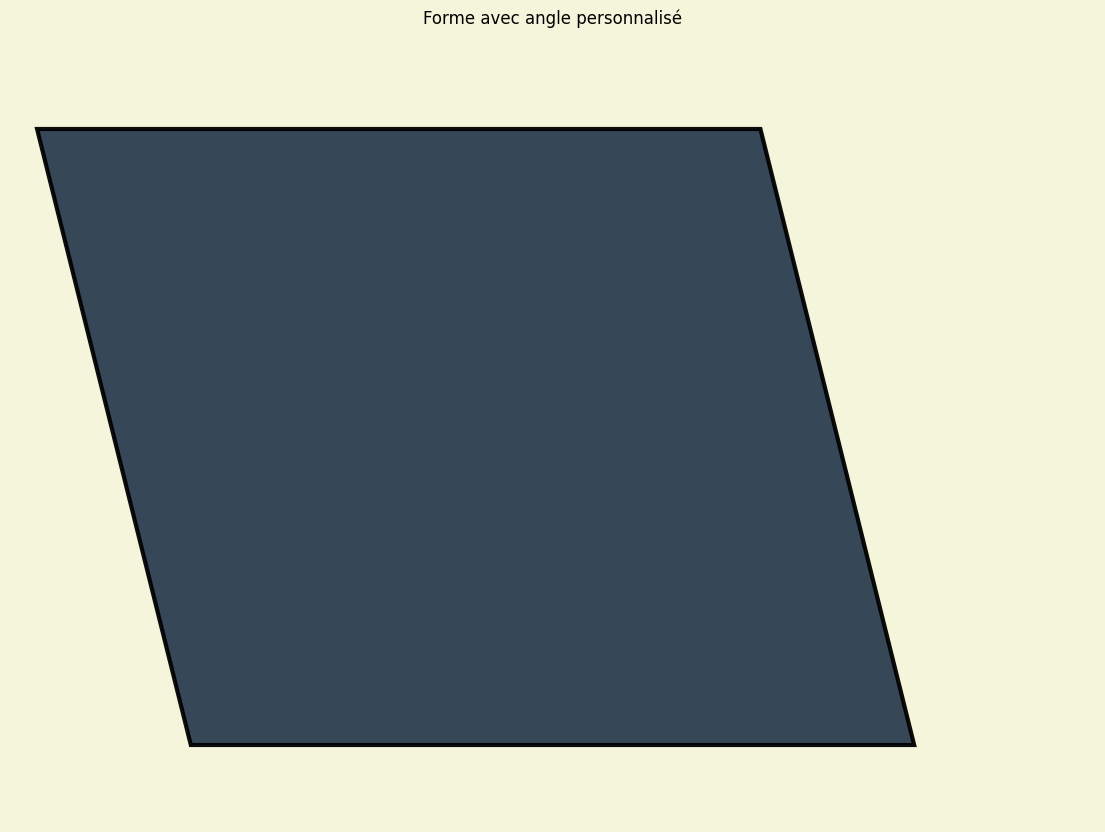

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.path import Path
import numpy as np

# Configuration des données avec les couleurs exactes de l'image
data = [
    {"player": "BOADU", "team": "VfL BOCHUM", "xg": 0.62, "color": "#4ECDC4"},      # Bleu turquoise (surbrillance)
    {"player": "EKITIKE", "team": "EINTRACHT", "xg": 0.58, "color": "#FFFFFF"},     # Blanc
    {"player": "SCHICK", "team": "BAYER", "xg": 0.57, "color": "#FFFFFF"},         # Blanc
    {"player": "BONIFACE", "team": "BAYER", "xg": 0.56, "color": "#FFFFFF"},       # Blanc
    {"player": "GUIRASSY", "team": "BORUSSIA", "xg": 0.53, "color": "#FFFFFF"},    # Blanc
    {"player": "UNDAV", "team": "STUTTGART", "xg": 0.53, "color": "#FFFFFF"},      # Blanc
    {"player": "DEMIROVIĆ", "team": "STUTTGART", "xg": 0.49, "color": "#FFFFFF"},  # Blanc
    {"player": "KANE", "team": "BAYERN", "xg": 0.47, "color": "#FFFFFF"},          # Blanc
    {"player": "BURKARDT", "team": "MAINZ", "xg": 0.47, "color": "#FFFFFF"},       # Blanc
    {"player": "KLEINDIENST", "team": "GLADBACH", "xg": 0.40, "color": "#FFFFFF"}  # Blanc
]

# Configuration de la figure
fig, ax = plt.subplots(figsize=(14, 10))
fig.patch.set_facecolor('#F5F5DC')

# Suppression des axes
ax.set_xlim(0, 12)
ax.set_ylim(0, 10)
ax.axis('off')

# Définition des points pour la forme trapézoïdale/parallélogramme
# Points dans le sens horaire : bas-gauche, haut-gauche, haut-droite, bas-droite
trap_points = np.array([
    [2, 1],      # bas-gauche
    [1, 9],      # haut-gauche  
    [10, 9],     # haut-droite
    [11, 1]      # bas-droite
])

# Création du Path pour la forme
codes = [Path.MOVETO, Path.LINETO, Path.LINETO, Path.LINETO, Path.CLOSEPOLY]
path_points = np.vstack([trap_points, trap_points[0]])  # Fermer la forme
path = Path(path_points, codes)

# Création du patch avec la forme trapézoïdale
trap_patch = patches.PathPatch(path, facecolor='#2C3E50', edgecolor='black', 
                              linewidth=3, alpha=0.95)
ax.add_patch(trap_patch)

# Titre et sous-titre (positionnés en haut à gauche)
ax.text(0.5, 8.5, "BUNDESLIGA CF'S 2024-25", fontsize=24, fontweight='bold', 
        color='#2C3E50', family='sans-serif')
ax.text(0.5, 7.8, "NON-PENALTY XG PER 90", fontsize=18, fontweight='bold', 
        color='#2C3E50', family='sans-serif')

# Calcul des positions Y pour les joueurs (distribution uniforme dans la forme)
y_positions = np.linspace(8.2, 2.2, len(data))

# Calcul des positions X correspondantes pour suivre la forme trapézoïdale
def get_x_position_for_y(y_val):
    """Calcule la position X gauche du trapèze pour une position Y donnée"""
    # Interpolation linéaire entre les bords gauches du trapèze
    # y=9: x=1, y=1: x=2
    return 1 + (2-1) * (9-y_val) / (9-1)

# Affichage des statistiques
for i, player_data in enumerate(data):
    y_pos = y_positions[i]
    x_base = get_x_position_for_y(y_pos)
    
    # Rectangle coloré pour la valeur xG
    xg_rect = patches.Rectangle((x_base + 0.2, y_pos-0.2), 1.2, 0.4, 
                               facecolor=player_data["color"], alpha=0.9,
                               edgecolor='white', linewidth=1)
    ax.add_patch(xg_rect)
    
    # Valeur xG en noir pour les bandes blanches, blanc pour BOADU
    text_color = 'black' if player_data["color"] == "#FFFFFF" else 'white'
    ax.text(x_base + 0.8, y_pos, f"{player_data['xg']:.2f}", 
            fontsize=16, fontweight='bold', ha='center', va='center', 
            color=text_color, family='monospace')
    
    # Nom du joueur
    ax.text(x_base + 1.6, y_pos + 0.1, player_data["player"], 
            fontsize=14, fontweight='bold', ha='left', va='center', 
            color='white', family='sans-serif')
    
    # Nom de l'équipe (plus petit, en dessous)
    ax.text(x_base + 1.6, y_pos - 0.15, player_data["team"], 
            fontsize=10, ha='left', va='center', 
            color='#CCCCCC', family='sans-serif')

# Zone pour l'image du joueur (à droite de la forme)
player_img_rect = patches.Rectangle((11.5, 2), 0.3, 6, linewidth=2, 
                                   edgecolor='#2C3E50', facecolor='none', 
                                   linestyle='--', alpha=0.5)
ax.add_patch(player_img_rect)
ax.text(11.65, 5, "IMG", ha='center', va='center', rotation=90,
        fontsize=10, color='#2C3E50', alpha=0.7)

plt.tight_layout()
plt.show()

# Version avec angles personnalisables
def create_trapezoid_chart(data, angle_deg=15, figsize=(14, 10)):
    """
    Crée un graphique avec forme trapézoïdale personnalisable
    
    Parameters:
    data (list): Données des joueurs
    angle_deg (float): Angle d'inclinaison en degrés
    figsize (tuple): Taille de la figure
    """
    
    fig, ax = plt.subplots(figsize=figsize)
    fig.patch.set_facecolor('#F5F5DC')
    
    ax.set_xlim(0, 12)
    ax.set_ylim(0, 10)
    ax.axis('off')
    
    # Calcul des points du trapèze basé sur l'angle
    angle_rad = np.radians(angle_deg)
    offset = 8 * np.tan(angle_rad)  # Décalage horizontal
    
    trap_points = np.array([
        [2, 1],              # bas-gauche
        [2 - offset, 9],     # haut-gauche
        [10 - offset, 9],    # haut-droite
        [10, 1]              # bas-droite
    ])
    
    # Création de la forme
    codes = [Path.MOVETO, Path.LINETO, Path.LINETO, Path.LINETO, Path.CLOSEPOLY]
    path_points = np.vstack([trap_points, trap_points[0]])
    path = Path(path_points, codes)
    
    trap_patch = patches.PathPatch(path, facecolor='#2C3E50', 
                                  edgecolor='black', linewidth=3, alpha=0.95)
    ax.add_patch(trap_patch)
    
    return fig, ax, trap_points

# Exemple d'utilisation avec différents angles
fig2, ax2, points = create_trapezoid_chart(data, angle_deg=12)
ax2.set_title("Forme avec angle personnalisé", pad=20)

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Générateur de base de données des clubs de football européens 2024-25
Crée un fichier CSV et Excel avec toutes les équipes des principales ligues européennes
"""

import pandas as pd
import csv
from datetime import datetime

def create_european_football_database():
    """
    Crée une base de données complète des clubs de football européens
    avec les colonnes: Logo, Name, City, Country, Division
    """
    
    # Liste complète de toutes les équipes
    teams_data = [
        # ANGLETERRE - Premier League (20 équipes)
        ["https://en.wikipedia.org/wiki/File:Arsenal_FC.svg", "Arsenal", "London", "England", "Premier League"],
        ["https://en.wikipedia.org/wiki/File:Aston_Villa_FC_crest_(2016).svg", "Aston Villa", "Birmingham", "England", "Premier League"],
        ["https://en.wikipedia.org/wiki/File:AFC_Bournemouth_(2013).svg", "AFC Bournemouth", "Bournemouth", "England", "Premier League"],
        ["https://en.wikipedia.org/wiki/File:Brentford_FC_crest.svg", "Brentford", "London", "England", "Premier League"],
        ["https://en.wikipedia.org/wiki/File:Brighton_%26_Hove_Albion_logo.svg", "Brighton & Hove Albion", "Brighton", "England", "Premier League"],
        ["https://en.wikipedia.org/wiki/File:Chelsea_FC.svg", "Chelsea", "London", "England", "Premier League"],
        ["https://en.wikipedia.org/wiki/File:Crystal_Palace_FC_logo.svg", "Crystal Palace", "London", "England", "Premier League"],
        ["https://en.wikipedia.org/wiki/File:Everton_FC_logo.svg", "Everton", "Liverpool", "England", "Premier League"],
        ["https://en.wikipedia.org/wiki/File:Fulham_FC_(shield).svg", "Fulham", "London", "England", "Premier League"],
        ["https://en.wikipedia.org/wiki/File:Ipswich_Town.svg", "Ipswich Town", "Ipswich", "England", "Premier League"],
        ["https://en.wikipedia.org/wiki/File:Leicester_City_crest.svg", "Leicester City", "Leicester", "England", "Premier League"],
        ["https://en.wikipedia.org/wiki/File:FC_Liverpool_(alt).svg", "Liverpool", "Liverpool", "England", "Premier League"],
        ["https://en.wikipedia.org/wiki/File:Manchester_City_FC_badge.svg", "Manchester City", "Manchester", "England", "Premier League"],
        ["https://en.wikipedia.org/wiki/File:Manchester_United_FC_crest.svg", "Manchester United", "Manchester", "England", "Premier League"],
        ["https://en.wikipedia.org/wiki/File:Newcastle_United_Logo.svg", "Newcastle United", "Newcastle", "England", "Premier League"],
        ["https://en.wikipedia.org/wiki/File:Nottingham_Forest_F.C._logo.svg", "Nottingham Forest", "Nottingham", "England", "Premier League"],
        ["https://en.wikipedia.org/wiki/File:Southampton_FC_logo.svg", "Southampton", "Southampton", "England", "Premier League"],
        ["https://en.wikipedia.org/wiki/File:Tottenham_Hotspur.svg", "Tottenham Hotspur", "London", "England", "Premier League"],
        ["https://en.wikipedia.org/wiki/File:West_Ham_United_FC_logo.svg", "West Ham United", "London", "England", "Premier League"],
        ["https://en.wikipedia.org/wiki/File:Wolverhampton_Wanderers.svg", "Wolverhampton Wanderers", "Wolverhampton", "England", "Premier League"],

        # ANGLETERRE - Championship (24 équipes)
        ["https://en.wikipedia.org/wiki/File:Blackburn_Rovers.svg", "Blackburn Rovers", "Blackburn", "England", "Championship"],
        ["https://en.wikipedia.org/wiki/File:Bristol_City_crest.svg", "Bristol City", "Bristol", "England", "Championship"],
        ["https://en.wikipedia.org/wiki/File:Burnley_FC_Logo.svg", "Burnley", "Burnley", "England", "Championship"],
        ["https://en.wikipedia.org/wiki/File:Cardiff_City_crest.svg", "Cardiff City", "Cardiff", "Wales", "Championship"],
        ["https://en.wikipedia.org/wiki/File:Coventry_City_FC_logo.svg", "Coventry City", "Coventry", "England", "Championship"],
        ["https://en.wikipedia.org/wiki/File:Derby_County_crest.svg", "Derby County", "Derby", "England", "Championship"],
        ["https://en.wikipedia.org/wiki/File:Hull_City_A.F.C._logo.svg", "Hull City", "Hull", "England", "Championship"],
        ["https://en.wikipedia.org/wiki/File:Leeds_United_logo.svg", "Leeds United", "Leeds", "England", "Championship"],
        ["https://en.wikipedia.org/wiki/File:Luton_Town_logo.svg", "Luton Town", "Luton", "England", "Championship"],
        ["https://en.wikipedia.org/wiki/File:Middlesbrough_FC_crest.svg", "Middlesbrough", "Middlesbrough", "England", "Championship"],
        ["https://en.wikipedia.org/wiki/File:Millwall_FC_logo.svg", "Millwall", "London", "England", "Championship"],
        ["https://en.wikipedia.org/wiki/File:Norwich_City.svg", "Norwich City", "Norwich", "England", "Championship"],
        ["https://en.wikipedia.org/wiki/File:Oxford_United_FC_logo.svg", "Oxford United", "Oxford", "England", "Championship"],
        ["https://en.wikipedia.org/wiki/File:Plymouth_Argyle_FC_logo.svg", "Plymouth Argyle", "Plymouth", "England", "Championship"],
        ["https://en.wikipedia.org/wiki/File:Portsmouth_FC_logo.svg", "Portsmouth", "Portsmouth", "England", "Championship"],
        ["https://en.wikipedia.org/wiki/File:Preston_North_End_FC.svg", "Preston North End", "Preston", "England", "Championship"],
        ["https://en.wikipedia.org/wiki/File:Queens_Park_Rangers_crest.svg", "Queens Park Rangers", "London", "England", "Championship"],
        ["https://en.wikipedia.org/wiki/File:Sheffield_United_FC_logo.svg", "Sheffield United", "Sheffield", "England", "Championship"],
        ["https://en.wikipedia.org/wiki/File:Sheffield_Wednesday_badge.svg", "Sheffield Wednesday", "Sheffield", "England", "Championship"],
        ["https://en.wikipedia.org/wiki/File:Stoke_City_FC.svg", "Stoke City", "Stoke-on-Trent", "England", "Championship"],
        ["https://en.wikipedia.org/wiki/File:Sunderland_AFC_logo.svg", "Sunderland", "Sunderland", "England", "Championship"],
        ["https://en.wikipedia.org/wiki/File:Swansea_City_AFC_logo.svg", "Swansea City", "Swansea", "Wales", "Championship"],
        ["https://en.wikipedia.org/wiki/File:Watford.svg", "Watford", "Watford", "England", "Championship"],
        ["https://en.wikipedia.org/wiki/File:West_Bromwich_Albion.svg", "West Bromwich Albion", "West Bromwich", "England", "Championship"],

        # FRANCE - Ligue 1 (18 équipes)
        ["https://en.wikipedia.org/wiki/File:SCO_Angers_logo.svg", "Angers SCO", "Angers", "France", "Ligue 1"],
        ["https://en.wikipedia.org/wiki/File:AJ_Auxerre_logo.svg", "AJ Auxerre", "Auxerre", "France", "Ligue 1"],
        ["https://en.wikipedia.org/wiki/File:Stade_Brestois_29_logo.svg", "Stade Brestois", "Brest", "France", "Ligue 1"],
        ["https://en.wikipedia.org/wiki/File:RC_Lens_logo.svg", "RC Lens", "Lens", "France", "Ligue 1"],
        ["https://en.wikipedia.org/wiki/File:LOSC_Lille_logo.svg", "LOSC Lille", "Lille", "France", "Ligue 1"],
        ["https://en.wikipedia.org/wiki/File:Olympique_Lyonnais_logo.svg", "Olympique Lyonnais", "Lyon", "France", "Ligue 1"],
        ["https://en.wikipedia.org/wiki/File:Olympique_de_Marseille_logo.svg", "Olympique de Marseille", "Marseille", "France", "Ligue 1"],
        ["https://en.wikipedia.org/wiki/File:AS_Monaco_FC_logo.svg", "AS Monaco", "Monaco", "Monaco", "Ligue 1"],
        ["https://en.wikipedia.org/wiki/File:Montpellier_HSC_logo.svg", "Montpellier HSC", "Montpellier", "France", "Ligue 1"],
        ["https://en.wikipedia.org/wiki/File:FC_Nantes_logo.svg", "FC Nantes", "Nantes", "France", "Ligue 1"],
        ["https://en.wikipedia.org/wiki/File:OGC_Nice_logo.svg", "OGC Nice", "Nice", "France", "Ligue 1"],
        ["https://en.wikipedia.org/wiki/File:Paris_Saint-Germain_F.C..svg", "Paris Saint-Germain", "Paris", "France", "Ligue 1"],
        ["https://en.wikipedia.org/wiki/File:Stade_de_Reims_logo.svg", "Stade de Reims", "Reims", "France", "Ligue 1"],
        ["https://en.wikipedia.org/wiki/File:Stade_Rennais_FC.svg", "Stade Rennais", "Rennes", "France", "Ligue 1"],
        ["https://en.wikipedia.org/wiki/File:AS_Saint-Étienne_logo.svg", "AS Saint-Étienne", "Saint-Étienne", "France", "Ligue 1"],
        ["https://en.wikipedia.org/wiki/File:RC_Strasbourg_logo.svg", "RC Strasbourg", "Strasbourg", "France", "Ligue 1"],
        ["https://en.wikipedia.org/wiki/File:Toulouse_FC_logo.svg", "Toulouse FC", "Toulouse", "France", "Ligue 1"],
        ["https://en.wikipedia.org/wiki/File:Le_Havre_AC_logo.svg", "Le Havre AC", "Le Havre", "France", "Ligue 1"],

        # FRANCE - Ligue 2 (18 équipes)
        ["https://en.wikipedia.org/wiki/File:AC_Ajaccio_logo.svg", "AC Ajaccio", "Ajaccio", "France", "Ligue 2"],
        ["https://en.wikipedia.org/wiki/File:Amiens_SC_logo.svg", "Amiens SC", "Amiens", "France", "Ligue 2"],
        ["https://en.wikipedia.org/wiki/File:SC_Bastia_logo.svg", "SC Bastia", "Bastia", "France", "Ligue 2"],
        ["https://en.wikipedia.org/wiki/File:Caen_logo.svg", "SM Caen", "Caen", "France", "Ligue 2"],
        ["https://en.wikipedia.org/wiki/File:Clermont_Foot_63_logo.svg", "Clermont Foot", "Clermont-Ferrand", "France", "Ligue 2"],
        ["https://en.wikipedia.org/wiki/File:Dunkerque_logo.svg", "USL Dunkerque", "Dunkerque", "France", "Ligue 2"],
        ["https://en.wikipedia.org/wiki/File:Grenoble_Foot_38_logo.svg", "Grenoble Foot 38", "Grenoble", "France", "Ligue 2"],
        ["https://en.wikipedia.org/wiki/File:En_Avant_Guingamp_logo.svg", "En Avant Guingamp", "Guingamp", "France", "Ligue 2"],
        ["https://en.wikipedia.org/wiki/File:Laval_logo.svg", "Stade Lavallois", "Laval", "France", "Ligue 2"],
        ["https://en.wikipedia.org/wiki/File:FC_Lorient_logo.svg", "FC Lorient", "Lorient", "France", "Ligue 2"],
        ["https://en.wikipedia.org/wiki/File:FC_Martigues_logo.svg", "FC Martigues", "Martigues", "France", "Ligue 2"],
        ["https://en.wikipedia.org/wiki/File:FC_Metz_logo.svg", "FC Metz", "Metz", "France", "Ligue 2"],
        ["https://en.wikipedia.org/wiki/File:Paris_FC_logo.svg", "Paris FC", "Paris", "France", "Ligue 2"],
        ["https://en.wikipedia.org/wiki/File:Pau_FC_logo.svg", "Pau FC", "Pau", "France", "Ligue 2"],
        ["https://en.wikipedia.org/wiki/File:Red_Star_FC_logo.svg", "Red Star FC", "Paris", "France", "Ligue 2"],
        ["https://en.wikipedia.org/wiki/File:Rodez_AF_logo.svg", "Rodez AF", "Rodez", "France", "Ligue 2"],
        ["https://en.wikipedia.org/wiki/File:Troyes_AC_logo.svg", "ES Troyes AC", "Troyes", "France", "Ligue 2"],
        ["https://en.wikipedia.org/wiki/File:Valenciennes_FC_logo.svg", "Valenciennes FC", "Valenciennes", "France", "Ligue 2"],

        # ITALIE - Serie A (20 équipes)
        ["https://en.wikipedia.org/wiki/File:Atalanta_BC_logo.svg", "Atalanta", "Bergamo", "Italy", "Serie A"],
        ["https://en.wikipedia.org/wiki/File:Bologna_FC_1909_logo.svg", "Bologna", "Bologna", "Italy", "Serie A"],
        ["https://en.wikipedia.org/wiki/File:Cagliari_Calcio_1920_logo.svg", "Cagliari", "Cagliari", "Italy", "Serie A"],
        ["https://en.wikipedia.org/wiki/File:Como_1907_logo.svg", "Como", "Como", "Italy", "Serie A"],
        ["https://en.wikipedia.org/wiki/File:Empoli_FC_logo.svg", "Empoli", "Empoli", "Italy", "Serie A"],
        ["https://en.wikipedia.org/wiki/File:ACF_Fiorentina_logo.svg", "Fiorentina", "Florence", "Italy", "Serie A"],
        ["https://en.wikipedia.org/wiki/File:Genoa_CFC_logo.svg", "Genoa", "Genoa", "Italy", "Serie A"],
        ["https://en.wikipedia.org/wiki/File:FC_Internazionale_Milano_2021.svg", "Inter Milan", "Milan", "Italy", "Serie A"],
        ["https://en.wikipedia.org/wiki/File:Juventus_FC_2017_logo.svg", "Juventus", "Turin", "Italy", "Serie A"],
        ["https://en.wikipedia.org/wiki/File:SS_Lazio_logo.svg", "Lazio", "Rome", "Italy", "Serie A"],
        ["https://en.wikipedia.org/wiki/File:AC_Milan_logo.svg", "AC Milan", "Milan", "Italy", "Serie A"],
        ["https://en.wikipedia.org/wiki/File:AC_Monza_logo.svg", "Monza", "Monza", "Italy", "Serie A"],
        ["https://en.wikipedia.org/wiki/File:SSC_Napoli_2007.svg", "Napoli", "Naples", "Italy", "Serie A"],
        ["https://en.wikipedia.org/wiki/File:Parma_FC_logo.svg", "Parma", "Parma", "Italy", "Serie A"],
        ["https://en.wikipedia.org/wiki/File:AS_Roma_logo_(2017).svg", "AS Roma", "Rome", "Italy", "Serie A"],
        ["https://en.wikipedia.org/wiki/File:Torino_FC_logo.svg", "Torino", "Turin", "Italy", "Serie A"],
        ["https://en.wikipedia.org/wiki/File:Udinese_Calcio_logo.svg", "Udinese", "Udine", "Italy", "Serie A"],
        ["https://en.wikipedia.org/wiki/File:Venezia_FC_logo.svg", "Venezia", "Venice", "Italy", "Serie A"],
        ["https://en.wikipedia.org/wiki/File:Hellas_Verona_FC_logo.svg", "Hellas Verona", "Verona", "Italy", "Serie A"],
        ["https://en.wikipedia.org/wiki/File:US_Lecce_logo.svg", "US Lecce", "Lecce", "Italy", "Serie A"],

        # ITALIE - Serie B (20 équipes)
        ["https://en.wikipedia.org/wiki/File:US_Avellino_1912_logo.svg", "Avellino", "Avellino", "Italy", "Serie B"],
        ["https://en.wikipedia.org/wiki/File:Bari_1908_logo.svg", "Bari", "Bari", "Italy", "Serie B"],
        ["https://en.wikipedia.org/wiki/File:Brescia_Calcio_logo.svg", "Brescia", "Brescia", "Italy", "Serie B"],
        ["https://en.wikipedia.org/wiki/File:Carrarese_Calcio_logo.svg", "Carrarese", "Carrara", "Italy", "Serie B"],
        ["https://en.wikipedia.org/wiki/File:Catanzaro_logo.svg", "Catanzaro", "Catanzaro", "Italy", "Serie B"],
        ["https://en.wikipedia.org/wiki/File:Cesena_FC_logo.svg", "Cesena", "Cesena", "Italy", "Serie B"],
        ["https://en.wikipedia.org/wiki/File:AS_Cittadella_logo.svg", "Cittadella", "Cittadella", "Italy", "Serie B"],
        ["https://en.wikipedia.org/wiki/File:Cosenza_Calcio_logo.svg", "Cosenza", "Cosenza", "Italy", "Serie B"],
        ["https://en.wikipedia.org/wiki/File:Cremonese_logo.svg", "Cremonese", "Cremona", "Italy", "Serie B"],
        ["https://en.wikipedia.org/wiki/File:Frosinone_Calcio_logo.svg", "Frosinone", "Frosinone", "Italy", "Serie B"],
        ["https://en.wikipedia.org/wiki/File:SS_Juve_Stabia_logo.svg", "Juve Stabia", "Castellammare di Stabia", "Italy", "Serie B"],
        ["https://en.wikipedia.org/wiki/File:Mantova_1911_logo.svg", "Mantova", "Mantova", "Italy", "Serie B"],
        ["https://en.wikipedia.org/wiki/File:Modena_FC_logo.svg", "Modena", "Modena", "Italy", "Serie B"],
        ["https://en.wikipedia.org/wiki/File:Palermo_FC_logo.svg", "Palermo", "Palermo", "Italy", "Serie B"],
        ["https://en.wikipedia.org/wiki/File:Pisa_SC_logo.svg", "Pisa", "Pisa", "Italy", "Serie B"],
        ["https://en.wikipedia.org/wiki/File:Reggiana_logo.svg", "Reggiana", "Reggio Emilia", "Italy", "Serie B"],
        ["https://en.wikipedia.org/wiki/File:US_Salernitana_1919_logo.svg", "Salernitana", "Salerno", "Italy", "Serie B"],
        ["https://en.wikipedia.org/wiki/File:US_Sampdoria_logo.svg", "Sampdoria", "Genoa", "Italy", "Serie B"],
        ["https://en.wikipedia.org/wiki/File:US_Sassuolo_Calcio_logo.svg", "Sassuolo", "Sassuolo", "Italy", "Serie B"],
        ["https://en.wikipedia.org/wiki/File:Spezia_Calcio_logo.svg", "Spezia", "La Spezia", "Italy", "Serie B"],

        # ESPAGNE - La Liga (20 équipes)
        ["https://en.wikipedia.org/wiki/File:Athletic_Bilbao.svg", "Athletic Bilbao", "Bilbao", "Spain", "La Liga"],
        ["https://en.wikipedia.org/wiki/File:Atletico_Madrid_2017_logo.svg", "Atlético Madrid", "Madrid", "Spain", "La Liga"],
        ["https://en.wikipedia.org/wiki/File:FC_Barcelona_(crest).svg", "FC Barcelona", "Barcelona", "Spain", "La Liga"],
        ["https://en.wikipedia.org/wiki/File:Real_Betis_logo.svg", "Real Betis", "Seville", "Spain", "La Liga"],
        ["https://en.wikipedia.org/wiki/File:Celta_de_Vigo_logo.svg", "Celta Vigo", "Vigo", "Spain", "La Liga"],
        ["https://en.wikipedia.org/wiki/File:RCD_Espanyol_logo.svg", "Espanyol", "Barcelona", "Spain", "La Liga"],
        ["https://en.wikipedia.org/wiki/File:Getafe_CF_logo.svg", "Getafe", "Getafe", "Spain", "La Liga"],
        ["https://en.wikipedia.org/wiki/File:Girona_FC_logo.svg", "Girona", "Girona", "Spain", "La Liga"],
        ["https://en.wikipedia.org/wiki/File:UD_Las_Palmas_logo.svg", "Las Palmas", "Las Palmas", "Spain", "La Liga"],
        ["https://en.wikipedia.org/wiki/File:CD_Legané s_logo.svg", "Leganés", "Leganés", "Spain", "La Liga"],
        ["https://en.wikipedia.org/wiki/File:RCD_Mallorca_logo.svg", "RCD Mallorca", "Palma", "Spain", "La Liga"],
        ["https://en.wikipedia.org/wiki/File:CA_Osasuna_logo.svg", "CA Osasuna", "Pamplona", "Spain", "La Liga"],
        ["https://en.wikipedia.org/wiki/File:Rayo_Vallecano_logo.svg", "Rayo Vallecano", "Madrid", "Spain", "La Liga"],
        ["https://en.wikipedia.org/wiki/File:Real_Madrid_CF.svg", "Real Madrid", "Madrid", "Spain", "La Liga"],
        ["https://en.wikipedia.org/wiki/File:Real_Sociedad_logo.svg", "Real Sociedad", "San Sebastián", "Spain", "La Liga"],
        ["https://en.wikipedia.org/wiki/File:Sevilla_FC_logo.svg", "Sevilla", "Seville", "Spain", "La Liga"],
        ["https://en.wikipedia.org/wiki/File:Valencia_CF_logo.svg", "Valencia", "Valencia", "Spain", "La Liga"],
        ["https://en.wikipedia.org/wiki/File:Real_Valladolid_Logo.svg", "Real Valladolid", "Valladolid", "Spain", "La Liga"],
        ["https://en.wikipedia.org/wiki/File:Villarreal_CF_logo.svg", "Villarreal", "Villarreal", "Spain", "La Liga"],
        ["https://en.wikipedia.org/wiki/File:Deportivo_Alavés_logo.svg", "Deportivo Alavés", "Vitoria-Gasteiz", "Spain", "La Liga"],

        # ESPAGNE - Segunda División (22 équipes principales)
        ["https://en.wikipedia.org/wiki/File:Albacete_Balompié_logo.svg", "Albacete", "Albacete", "Spain", "Segunda División"],
        ["https://en.wikipedia.org/wiki/File:UD_Almería_logo.svg", "UD Almería", "Almería", "Spain", "Segunda División"],
        ["https://en.wikipedia.org/wiki/File:CF_Burgos_logo.svg", "Burgos CF", "Burgos", "Spain", "Segunda División"],
        ["https://en.wikipedia.org/wiki/File:Cádiz_CF_logo.svg", "Cádiz CF", "Cádiz", "Spain", "Segunda División"],
        ["https://en.wikipedia.org/wiki/File:FC_Cartagena_logo.svg", "FC Cartagena", "Cartagena", "Spain", "Segunda División"],
        ["https://en.wikipedia.org/wiki/File:CD_Castellón_logo.svg", "CD Castellón", "Castellón", "Spain", "Segunda División"],
        ["https://en.wikipedia.org/wiki/File:Córdoba_CF_logo.svg", "Córdoba CF", "Córdoba", "Spain", "Segunda División"],
        ["https://en.wikipedia.org/wiki/File:Deportivo_de_La_Coruña_logo.svg", "Deportivo La Coruña", "A Coruña", "Spain", "Segunda División"],
        ["https://en.wikipedia.org/wiki/File:CD_Eldense_logo.svg", "CD Eldense", "Elda", "Spain", "Segunda División"],
        ["https://en.wikipedia.org/wiki/File:Elche_CF_logo.svg", "Elche CF", "Elche", "Spain", "Segunda División"],
        ["https://en.wikipedia.org/wiki/File:Granada_CF_logo.svg", "Granada CF", "Granada", "Spain", "Segunda División"],
        ["https://en.wikipedia.org/wiki/File:SD_Huesca_logo.svg", "SD Huesca", "Huesca", "Spain", "Segunda División"],
        ["https://en.wikipedia.org/wiki/File:Levante_UD_logo.svg", "Levante UD", "Valencia", "Spain", "Segunda División"],
        ["https://en.wikipedia.org/wiki/File:Málaga_CF_logo.svg", "Málaga CF", "Málaga", "Spain", "Segunda División"],
        ["https://en.wikipedia.org/wiki/File:CD_Mirandés_logo.svg", "CD Mirandés", "Miranda de Ebro", "Spain", "Segunda División"],
        ["https://en.wikipedia.org/wiki/File:Real_Oviedo_logo.svg", "Real Oviedo", "Oviedo", "Spain", "Segunda División"],
        ["https://en.wikipedia.org/wiki/File:Racing_de_Ferrol_logo.svg", "Racing Ferrol", "Ferrol", "Spain", "Segunda División"],
        ["https://en.wikipedia.org/wiki/File:Racing_de_Santander_logo.svg", "Racing Santander", "Santander", "Spain", "Segunda División"],
        ["https://en.wikipedia.org/wiki/File:Sporting_de_Gijón_logo.svg", "Sporting Gijón", "Gijón", "Spain", "Segunda División"],
        ["https://en.wikipedia.org/wiki/File:CD_Tenerife_logo.svg", "CD Tenerife", "Santa Cruz de Tenerife", "Spain", "Segunda División"],
        ["https://en.wikipedia.org/wiki/File:Real_Zaragoza_logo.svg", "Real Zaragoza", "Zaragoza", "Spain", "Segunda División"],
        ["https://en.wikipedia.org/wiki/File:UD_Logroñés_logo.svg", "UD Logroñés", "Logroño", "Spain", "Segunda División"],

        # ALLEMAGNE - Bundesliga (18 équipes)
        ["https://en.wikipedia.org/wiki/File:FC_Augsburg_logo.svg", "FC Augsburg", "Augsburg", "Germany", "Bundesliga"],
        ["https://en.wikipedia.org/wiki/File:Bayer_04_Leverkusen_logo.svg", "Bayer Leverkusen", "Leverkusen", "Germany", "Bundesliga"],
        ["https://en.wikipedia.org/wiki/File:FC_Bayern_München_logo_(2017).svg", "Bayern Munich", "Munich", "Germany", "Bundesliga"],
        ["https://en.wikipedia.org/wiki/File:VfL_Bochum_logo.svg", "VfL Bochum", "Bochum", "Germany", "Bundesliga"],
        ["https://en.wikipedia.org/wiki/File:Borussia_Dortmund_logo.svg", "Borussia Dortmund", "Dortmund", "Germany", "Bundesliga"],
        ["https://en.wikipedia.org/wiki/File:Borussia_Mönchengladbach_logo.svg", "Borussia Mönchengladbach", "Mönchengladbach", "Germany", "Bundesliga"],
        ["https://en.wikipedia.org/wiki/File:Eintracht_Frankfurt_Logo.svg", "Eintracht Frankfurt", "Frankfurt", "Germany", "Bundesliga"],
        ["https://en.wikipedia.org/wiki/File:SC_Freiburg_logo.svg", "SC Freiburg", "Freiburg", "Germany", "Bundesliga"],
        ["https://en.wikipedia.org/wiki/File:1._FC_Heidenheim_1846_logo.svg", "1. FC Heidenheim", "Heidenheim", "Germany", "Bundesliga"],
        ["https://en.wikipedia.org/wiki/File:TSG_1899_Hoffenheim_logo.svg", "TSG Hoffenheim", "Hoffenheim", "Germany", "Bundesliga"],
        ["https://en.wikipedia.org/wiki/File:Holstein_Kiel_logo.svg", "Holstein Kiel", "Kiel", "Germany", "Bundesliga"],
        ["https://en.wikipedia.org/wiki/File:RB_Leipzig_2014_logo.svg", "RB Leipzig", "Leipzig", "Germany", "Bundesliga"],
        ["https://en.wikipedia.org/wiki/File:1._FSV_Mainz_05_logo.svg", "1. FSV Mainz 05", "Mainz", "Germany", "Bundesliga"],
        ["https://en.wikipedia.org/wiki/File:FC_St._Pauli_logo.svg", "FC St. Pauli", "Hamburg", "Germany", "Bundesliga"],
        ["https://en.wikipedia.org/wiki/File:VfB_Stuttgart_1893_Logo.svg", "VfB Stuttgart", "Stuttgart", "Germany", "Bundesliga"],
        ["https://en.wikipedia.org/wiki/File:1._FC_Union_Berlin_Logo.svg", "1. FC Union Berlin", "Berlin", "Germany", "Bundesliga"],
        ["https://en.wikipedia.org/wiki/File:VfL_Wolfsburg_logo.svg", "VfL Wolfsburg", "Wolfsburg", "Germany", "Bundesliga"],
        ["https://en.wikipedia.org/wiki/File:SV_Werder_Bremen_logo.svg", "Werder Bremen", "Bremen", "Germany", "Bundesliga"],

        # ALLEMAGNE - 2. Bundesliga (18 équipes)
        ["https://en.wikipedia.org/wiki/File:Eintracht_Braunschweig_Logo.svg", "Eintracht Braunschweig", "Braunschweig", "Germany", "2. Bundesliga"],
        ["https://en.wikipedia.org/wiki/File:SV_Darmstadt_98_logo.svg", "SV Darmstadt 98", "Darmstadt", "Germany", "2. Bundesliga"],
        ["https://en.wikipedia.org/wiki/File:SV_Elversberg_logo.svg", "SV Elversberg", "Elversberg", "Germany", "2. Bundesliga"],
        ["https://en.wikipedia.org/wiki/File:Fortuna_Düsseldorf_logo.svg", "Fortuna Düsseldorf", "Düsseldorf", "Germany", "2. Bundesliga"],
        ["https://en.wikipedia.org/wiki/File:SpVgg_Greuther_Fürth_logo.svg", "Greuther Fürth", "Fürth", "Germany", "2. Bundesliga"],
        ["https://en.wikipedia.org/wiki/File:Hamburger_SV_logo.svg", "Hamburger SV", "Hamburg", "Germany", "2. Bundesliga"],
        ["https://en.wikipedia.org/wiki/File:Hannover_96_logo.svg", "Hannover 96", "Hannover", "Germany", "2. Bundesliga"],
        ["https://en.wikipedia.org/wiki/File:Hertha_BSC_Logo_2012.svg", "Hertha BSC", "Berlin", "Germany", "2. Bundesliga"],
        ["https://en.wikipedia.org/wiki/File:1._FC_Kaiserslautern_logo.svg", "1. FC Kaiserslautern", "Kaiserslautern", "Germany", "2. Bundesliga"],
        ["https://en.wikipedia.org/wiki/File:Karlsruher_SC_Logo.svg", "Karlsruher SC", "Karlsruhe", "Germany", "2. Bundesliga"],
        ["https://en.wikipedia.org/wiki/File:1._FC_Köln_logo.svg", "1. FC Köln", "Cologne", "Germany", "2. Bundesliga"],
        ["https://en.wikipedia.org/wiki/File:SSV_Ulm_1846_logo.svg", "SSV Ulm 1846", "Ulm", "Germany", "2. Bundesliga"],
        ["https://en.wikipedia.org/wiki/File:1._FC_Magdeburg_logo.svg", "1. FC Magdeburg", "Magdeburg", "Germany", "2. Bundesliga"],
        ["https://en.wikipedia.org/wiki/File:1._FC_Nürnberg_logo.svg", "1. FC Nürnberg", "Nuremberg", "Germany", "2. Bundesliga"],
        ["https://en.wikipedia.org/wiki/File:SC_Paderborn_07_logo.svg", "SC Paderborn 07", "Paderborn", "Germany", "2. Bundesliga"],
        ["https://en.wikipedia.org/wiki/File:Preußen_Münster_logo.svg", "Preußen Münster", "Münster", "Germany", "2. Bundesliga"],
        ["https://en.wikipedia.org/wiki/File:FC_Schalke_04_logo.svg", "FC Schalke 04", "Gelsenkirchen", "Germany", "2. Bundesliga"],
        ["https://en.wikipedia.org/wiki/File:SSV_Jahn_Regensburg_logo.svg", "SSV Jahn Regensburg", "Regensburg", "Germany", "2. Bundesliga"],

        # PORTUGAL - Primeira Liga (18 équipes)
        ["https://en.wikipedia.org/wiki/File:CD_Nacional_logo.png", "CD Nacional", "Funchal", "Portugal", "Primeira Liga"],
        ["https://en.wikipedia.org/wiki/File:Arouca_FC.png", "FC Arouca", "Arouca", "Portugal", "Primeira Liga"],
        ["https://en.wikipedia.org/wiki/File:AVS_Futebol_SAD_logo.png", "AVS", "Vila das Aves", "Portugal", "Primeira Liga"],
        ["https://en.wikipedia.org/wiki/File:SL_Benfica_logo.svg", "SL Benfica", "Lisbon", "Portugal", "Primeira Liga"],
        ["https://en.wikipedia.org/wiki/File:Boavista_FC.svg", "Boavista FC", "Porto", "Portugal", "Primeira Liga"],
        ["https://en.wikipedia.org/wiki/File:SC_Braga_logo.svg", "SC Braga", "Braga", "Portugal", "Primeira Liga"],
        ["https://en.wikipedia.org/wiki/File:Casa_Pia_AC_logo.png", "Casa Pia AC", "Lisbon", "Portugal", "Primeira Liga"],
        ["https://en.wikipedia.org/wiki/File:Estoril_Praia_logo.svg", "GD Estoril Praia", "Estoril", "Portugal", "Primeira Liga"],
        ["https://en.wikipedia.org/wiki/File:SC_Farense_logo.png", "SC Farense", "Faro", "Portugal", "Primeira Liga"],
        ["https://en.wikipedia.org/wiki/File:FC_Famalicão_logo.svg", "FC Famalicão", "Famalicão", "Portugal", "Primeira Liga"],
        ["https://en.wikipedia.org/wiki/File:Gil_Vicente_FC_logo.svg", "Gil Vicente FC", "Barcelos", "Portugal", "Primeira Liga"],
        ["https://en.wikipedia.org/wiki/File:Moreirense_FC_logo.svg", "Moreirense FC", "Moreira de Cónegos", "Portugal", "Primeira Liga"],
        ["https://en.wikipedia.org/wiki/File:FC_Porto_logo.svg", "FC Porto", "Porto", "Portugal", "Primeira Liga"],
        ["https://en.wikipedia.org/wiki/File:Rio_Ave_FC_logo.svg", "Rio Ave FC", "Vila do Conde", "Portugal", "Primeira Liga"],
        ["https://en.wikipedia.org/wiki/File:CD_Santa_Clara_logo.svg", "CD Santa Clara", "Ponta Delgada", "Portugal", "Primeira Liga"],
        ["https://en.wikipedia.org/wiki/File:Sporting_CP_logo.svg", "Sporting CP", "Lisbon", "Portugal", "Primeira Liga"],
        ["https://en.wikipedia.org/wiki/File:Estrela_da_Amadora_logo.svg", "Estrela da Amadora", "Amadora", "Portugal", "Primeira Liga"],
        ["https://en.wikipedia.org/wiki/File:Vitória_SC_logo.svg", "Vitória SC", "Guimarães", "Portugal", "Primeira Liga"],

        # PORTUGAL - Liga Portugal 2 (18 équipes)
        ["https://en.wikipedia.org/wiki/File:Académico_de_Viseu_FC_logo.svg", "Académico de Viseu", "Viseu", "Portugal", "Liga Portugal 2"],
        ["https://en.wikipedia.org/wiki/File:FC_Alverca_logo.png", "FC Alverca", "Alverca do Ribatejo", "Portugal", "Liga Portugal 2"],
        ["https://en.wikipedia.org/wiki/File:SL_Benfica_B_logo.svg", "SL Benfica B", "Lisbon", "Portugal", "Liga Portugal 2"],
        ["https://en.wikipedia.org/wiki/File:GD_Chaves_logo.svg", "GD Chaves", "Chaves", "Portugal", "Liga Portugal 2"],
        ["https://en.wikipedia.org/wiki/File:CD_Feirense_logo.svg", "CD Feirense", "Santa Maria da Feira", "Portugal", "Liga Portugal 2"],
        ["https://en.wikipedia.org/wiki/File:FC_Felgueiras_1932_logo.png", "FC Felgueiras 1932", "Felgueiras", "Portugal", "Liga Portugal 2"],
        ["https://en.wikipedia.org/wiki/File:Leixões_SC_logo.svg", "Leixões SC", "Matosinhos", "Portugal", "Liga Portugal 2"],
        ["https://en.wikipedia.org/wiki/File:CD_Mafra_logo.svg", "CD Mafra", "Mafra", "Portugal", "Liga Portugal 2"],
        ["https://en.wikipedia.org/wiki/File:CS_Marítimo_logo.svg", "CS Marítimo", "Funchal", "Portugal", "Liga Portugal 2"],
        ["https://en.wikipedia.org/wiki/File:Oliveirense_logo.svg", "UD Oliveirense", "Oliveira de Azeméis", "Portugal", "Liga Portugal 2"],
        ["https://en.wikipedia.org/wiki/File:FC_Penafiel_logo.svg", "FC Penafiel", "Penafiel", "Portugal", "Liga Portugal 2"],
        ["https://en.wikipedia.org/wiki/File:FC_Porto_B_logo.svg", "FC Porto B", "Porto", "Portugal", "Liga Portugal 2"],
        ["https://en.wikipedia.org/wiki/File:Portimonense_SC_logo.svg", "Portimonense SC", "Portimão", "Portugal", "Liga Portugal 2"],
        ["https://en.wikipedia.org/wiki/File:CD_Tondela_logo.svg", "CD Tondela", "Tondela", "Portugal", "Liga Portugal 2"],
        ["https://en.wikipedia.org/wiki/File:SC_União_Torreense_logo.svg", "SC União Torreense", "Torres Vedras", "Portugal", "Liga Portugal 2"],
        ["https://en.wikipedia.org/wiki/File:União_de_Leiria_logo.svg", "União de Leiria", "Leiria", "Portugal", "Liga Portugal 2"],
        ["https://en.wikipedia.org/wiki/File:FC_Vizela_logo.svg", "FC Vizela", "Vizela", "Portugal", "Liga Portugal 2"],
        ["https://en.wikipedia.org/wiki/File:Varzim_SC_logo.svg", "Varzim SC", "Póvoa de Varzim", "Portugal", "Liga Portugal 2"],

        # BELGIQUE - Belgian Pro League (16 équipes)
        ["https://en.wikipedia.org/wiki/File:RSC_Anderlecht_logo.svg", "RSC Anderlecht", "Brussels", "Belgium", "Belgian Pro League"],
        ["https://en.wikipedia.org/wiki/File:Royal_Antwerp_FC_logo.svg", "Royal Antwerp FC", "Antwerp", "Belgium", "Belgian Pro League"],
        ["https://en.wikipedia.org/wiki/File:K_Beerschot_VA_logo.svg", "K Beerschot VA", "Antwerp", "Belgium", "Belgian Pro League"],
        ["https://en.wikipedia.org/wiki/File:Club_Brugge_KV_logo.svg", "Club Brugge KV", "Bruges", "Belgium", "Belgian Pro League"],
        ["https://en.wikipedia.org/wiki/File:Cercle_Brugge_KSV_logo.svg", "Cercle Brugge KSV", "Bruges", "Belgium", "Belgian Pro League"],
        ["https://en.wikipedia.org/wiki/File:Charleroi_logo.svg", "R. Charleroi SC", "Charleroi", "Belgium", "Belgian Pro League"],
        ["https://en.wikipedia.org/wiki/File:FCV_Dender_EH_logo.svg", "FCV Dender EH", "Denderleeuw", "Belgium", "Belgian Pro League"],
        ["https://en.wikipedia.org/wiki/File:KAA_Gent_logo.svg", "KAA Gent", "Ghent", "Belgium", "Belgian Pro League"],
        ["https://en.wikipedia.org/wiki/File:KRC_Genk_logo.svg", "KRC Genk", "Genk", "Belgium", "Belgian Pro League"],
        ["https://en.wikipedia.org/wiki/File:KV_Kortrijk_logo.svg", "KV Kortrijk", "Kortrijk", "Belgium", "Belgian Pro League"],
        ["https://en.wikipedia.org/wiki/File:KV_Mechelen_logo.svg", "KV Mechelen", "Mechelen", "Belgium", "Belgian Pro League"],
        ["https://en.wikipedia.org/wiki/File:Oud-Heverlee_Leuven_logo.svg", "OH Leuven", "Leuven", "Belgium", "Belgian Pro League"],
        ["https://en.wikipedia.org/wiki/File:Standard_de_Liège_logo.svg", "Standard Liège", "Liège", "Belgium", "Belgian Pro League"],
        ["https://en.wikipedia.org/wiki/File:Sint-Truidense_VV_logo.svg", "Sint-Truiden", "Sint-Truiden", "Belgium", "Belgian Pro League"],
        ["https://en.wikipedia.org/wiki/File:Union_Saint-Gilloise_logo.svg", "Union Saint-Gilloise", "Brussels", "Belgium", "Belgian Pro League"],
        ["https://en.wikipedia.org/wiki/File:SV_Zulte_Waregem_logo.svg", "SV Zulte Waregem", "Waregem", "Belgium", "Belgian Pro League"],

        # BELGIQUE - Challenger Pro League (16 équipes)
        ["https://en.wikipedia.org/wiki/File:Beveren_logo.svg", "SK Beveren", "Beveren", "Belgium", "Challenger Pro League"],
        ["https://en.wikipedia.org/wiki/File:Club_NXT_logo.svg", "Club NXT", "Bruges", "Belgium", "Challenger Pro League"],
        ["https://en.wikipedia.org/wiki/File:KSC_Lokeren-Temse_logo.svg", "Lokeren-Temse", "Lokeren", "Belgium", "Challenger Pro League"],
        ["https://en.wikipedia.org/wiki/File:La_Louvière_Centre_logo.svg", "La Louvière", "La Louvière", "Belgium", "Challenger Pro League"],
        ["https://en.wikipedia.org/wiki/File:Lierse_Kempenzonen_logo.svg", "Lierse Kempenzonen", "Lier", "Belgium", "Challenger Pro League"],
        ["https://en.wikipedia.org/wiki/File:Lommel_SK_logo.svg", "Lommel SK", "Lommel", "Belgium", "Challenger Pro League"],
        ["https://en.wikipedia.org/wiki/File:KMSK_Deinze_logo.svg", "KMSK Deinze", "Deinze", "Belgium", "Challenger Pro League"],
        ["https://en.wikipedia.org/wiki/File:Patro_Eisden_logo.svg", "Patro Eisden", "Maasmechelen", "Belgium", "Challenger Pro League"],
        ["https://en.wikipedia.org/wiki/File:RFC_Seraing_logo.svg", "RFC Seraing", "Seraing", "Belgium", "Challenger Pro League"],
        ["https://en.wikipedia.org/wiki/File:Jong_KAA_Gent_logo.svg", "Jong KAA Gent", "Ghent", "Belgium", "Challenger Pro League"],
        ["https://en.wikipedia.org/wiki/File:Jong_KRC_Genk_logo.svg", "Jong KRC Genk", "Genk", "Belgium", "Challenger Pro League"],
        ["https://en.wikipedia.org/wiki/File:RWDM_FC_logo.svg", "RWDM FC", "Brussels", "Belgium", "Challenger Pro League"],
        ["https://en.wikipedia.org/wiki/File:KAS_Eupen_logo.svg", "KAS Eupen", "Eupen", "Belgium", "Challenger Pro League"],
        ["https://en.wikipedia.org/wiki/File:Francs_Borains_logo.svg", "Francs Borains", "Boussu", "Belgium", "Challenger Pro League"],
        ["https://en.wikipedia.org/wiki/File:RFC_Liège_logo.svg", "RFC Liège", "Liège", "Belgium", "Challenger Pro League"],
        ["https://en.wikipedia.org/wiki/File:Westerlo_logo.svg", "KVC Westerlo", "Westerlo", "Belgium", "Challenger Pro League"]
    ]
    
    # Définir les colonnes
    columns = ["Logo", "Name", "City", "Country", "Division"]
    
    # Créer le DataFrame
    df = pd.DataFrame(teams_data, columns=columns)
    
    return df

def save_to_files(df):
    """
    Sauvegarde le DataFrame en fichiers CSV et Excel
    """
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    
    # Fichier CSV
    csv_filename = f"European_Football_Clubs_2024-25_{timestamp}.csv"
    df.to_csv(csv_filename, index=False, encoding='utf-8')
    print(f"✅ Fichier CSV créé: {csv_filename}")
    
    # Fichier Excel avec formatage
    excel_filename = f"European_Football_Clubs_2024-25_{timestamp}.xlsx"
    
    with pd.ExcelWriter(excel_filename, engine='openpyxl') as writer:
        df.to_excel(writer, index=False, sheet_name='Football Clubs')
        
        # Obtenir la feuille de calcul pour le formatage
        worksheet = writer.sheets['Football Clubs']
        
        # Ajuster la largeur des colonnes
        column_widths = {
            'A': 50,  # Logo
            'B': 25,  # Name
            'C': 20,  # City
            'D': 15,  # Country
            'E': 20   # Division
        }
        
        for col, width in column_widths.items():
            worksheet.column_dimensions[col].width = width
    
    print(f"✅ Fichier Excel créé: {excel_filename}")
    
    return csv_filename, excel_filename

def print_statistics(df):
    """
    Affiche les statistiques de la base de données
    """
    print("\n" + "="*60)
    print("📊 STATISTIQUES DE LA BASE DE DONNÉES")
    print("="*60)
    
    total_teams = len(df)
    print(f"🏆 Total d'équipes: {total_teams}")
    
    print("\n📈 Répartition by pays:")
    country_stats = df['Country'].value_counts().sort_values(ascending=False)
    for country, count in country_stats.items():
        print(f"  🇪🇺 {country}: {count} équipes")
    
    print("\n🏟️ Répartition par division:")
    division_stats = df['Division'].value_counts().sort_values(ascending=False)
    for division, count in division_stats.items():
        print(f"  ⚽ {division}: {count} équipes")
    
    print("\n🏙️ Top 10 des villes avec le plus d'équipes:")
    city_stats = df['City'].value_counts().head(10)
    for city, count in city_stats.items():
        if count > 1:
            print(f"  🏙️ {city}: {count} équipes")

def main():
    """
    Fonction principale
    """
    print("🚀 Génération de la base de données des clubs de football européens 2024-25")
    print("="*70)
    
    try:
        # Créer la base de données
        print("📊 Création de la base de données...")
        df = create_european_football_database()
        
        # Afficher les statistiques
        print_statistics(df)
        
        # Sauvegarder les fichiers
        print("\n💾 Sauvegarde des fichiers...")
        csv_file, excel_file = save_to_files(df)
        
        print("\n" + "="*70)
        print("✅ GÉNÉRATION TERMINÉE AVEC SUCCÈS!")
        print(f"📄 Fichier CSV: {csv_file}")
        print(f"📊 Fichier Excel: {excel_file}")
        print("="*70)
        
        # Afficher un aperçu des données
        print("\n👁️ Aperçu des premières lignes:")
        print(df.head(10).to_string(index=False))
        
    except Exception as e:
        print(f"❌ Erreur lors de la génération: {str(e)}")
        return False
    
    return True

if __name__ == "__main__":
    # Installation des dépendances si nécessaire
    try:
        import pandas as pd
    except ImportError:
        print("❌ pandas n'est pas installé. Installez-le avec: pip install pandas openpyxl")
        exit(1)
    
    # Exécuter le script
    success = main()
    
    if success:
        print("\n🎉 Script exécuté avec succès!")
        print("📁 Les fichiers ont été créés dans le répertoire courant.")
    else:
        print("\n💥 Échec de l'exécution du script.")
        exit(1)

🚀 Génération de la base de données des clubs de football européens 2024-25
📊 Création de la base de données...

📊 STATISTIQUES DE LA BASE DE DONNÉES
🏆 Total d'équipes: 266

📈 Répartition by pays:
  🇪🇺 England: 42 équipes
  🇪🇺 Spain: 42 équipes
  🇪🇺 Italy: 40 équipes
  🇪🇺 Germany: 36 équipes
  🇪🇺 Portugal: 36 équipes
  🇪🇺 France: 35 équipes
  🇪🇺 Belgium: 32 équipes
  🇪🇺 Wales: 2 équipes
  🇪🇺 Monaco: 1 équipes

🏟️ Répartition par division:
  ⚽ Championship: 24 équipes
  ⚽ Segunda División: 22 équipes
  ⚽ Premier League: 20 équipes
  ⚽ Serie A: 20 équipes
  ⚽ Serie B: 20 équipes
  ⚽ La Liga: 20 équipes
  ⚽ Ligue 1: 18 équipes
  ⚽ Ligue 2: 18 équipes
  ⚽ Bundesliga: 18 équipes
  ⚽ 2. Bundesliga: 18 équipes
  ⚽ Primeira Liga: 18 équipes
  ⚽ Liga Portugal 2: 18 équipes
  ⚽ Belgian Pro League: 16 équipes
  ⚽ Challenger Pro League: 16 équipes

🏙️ Top 10 des villes avec le plus d'équipes:
  🏙️ London: 9 équipes
  🏙️ Lisbon: 4 équipes
  🏙️ Paris: 3 équipes
  🏙️ Brussels: 3 équipes
  🏙️ Bruges: 3